<a href="https://colab.research.google.com/github/sanjeev12-09/Age-prediction-of-Abalone/blob/main/decision_Tree_for_classification_Abalone_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import basic libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

# Loading the dataset

In this we will use Abalone dataset for classification

Abalone is a type of consumable snail whose price varies as per its age . The aim is to predict the age of abalone from physical measurements. The age of abalone is traditionally determined by cutting the shell throgh the cone, staining it and count the number of rings through microscope - a boring and time consuming task. Other measurements which are easier to obtain is to predict the age. 

In [ ]:
column_names = ['Sex','Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weights','Rings']
abalone_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data',header=None, names=column_names)

In [ ]:
type(abalone_data)

pandas.core.frame.DataFrame

In [ ]:
abalone_data.shape

(4177, 9)

In [ ]:
abalone_data.head(10)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weights,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20
7,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16
8,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,9
9,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,19


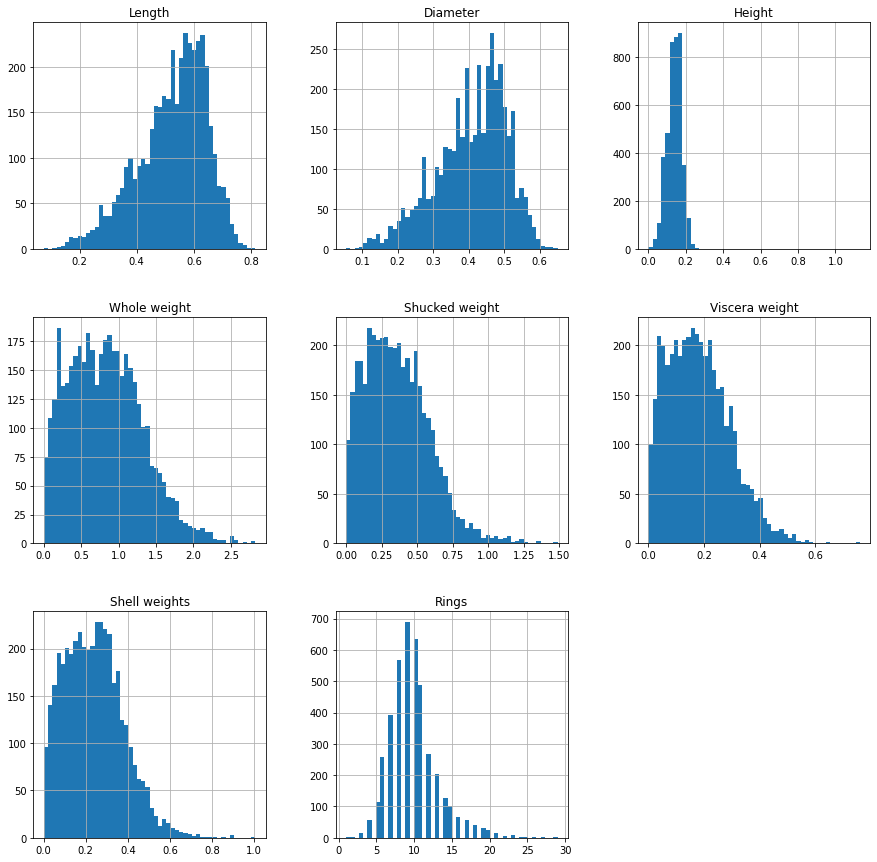

In [ ]:
abalone_data.hist(bins = 50, figsize = (15,15))
plt.show()

<Figure size 432x288 with 0 Axes>

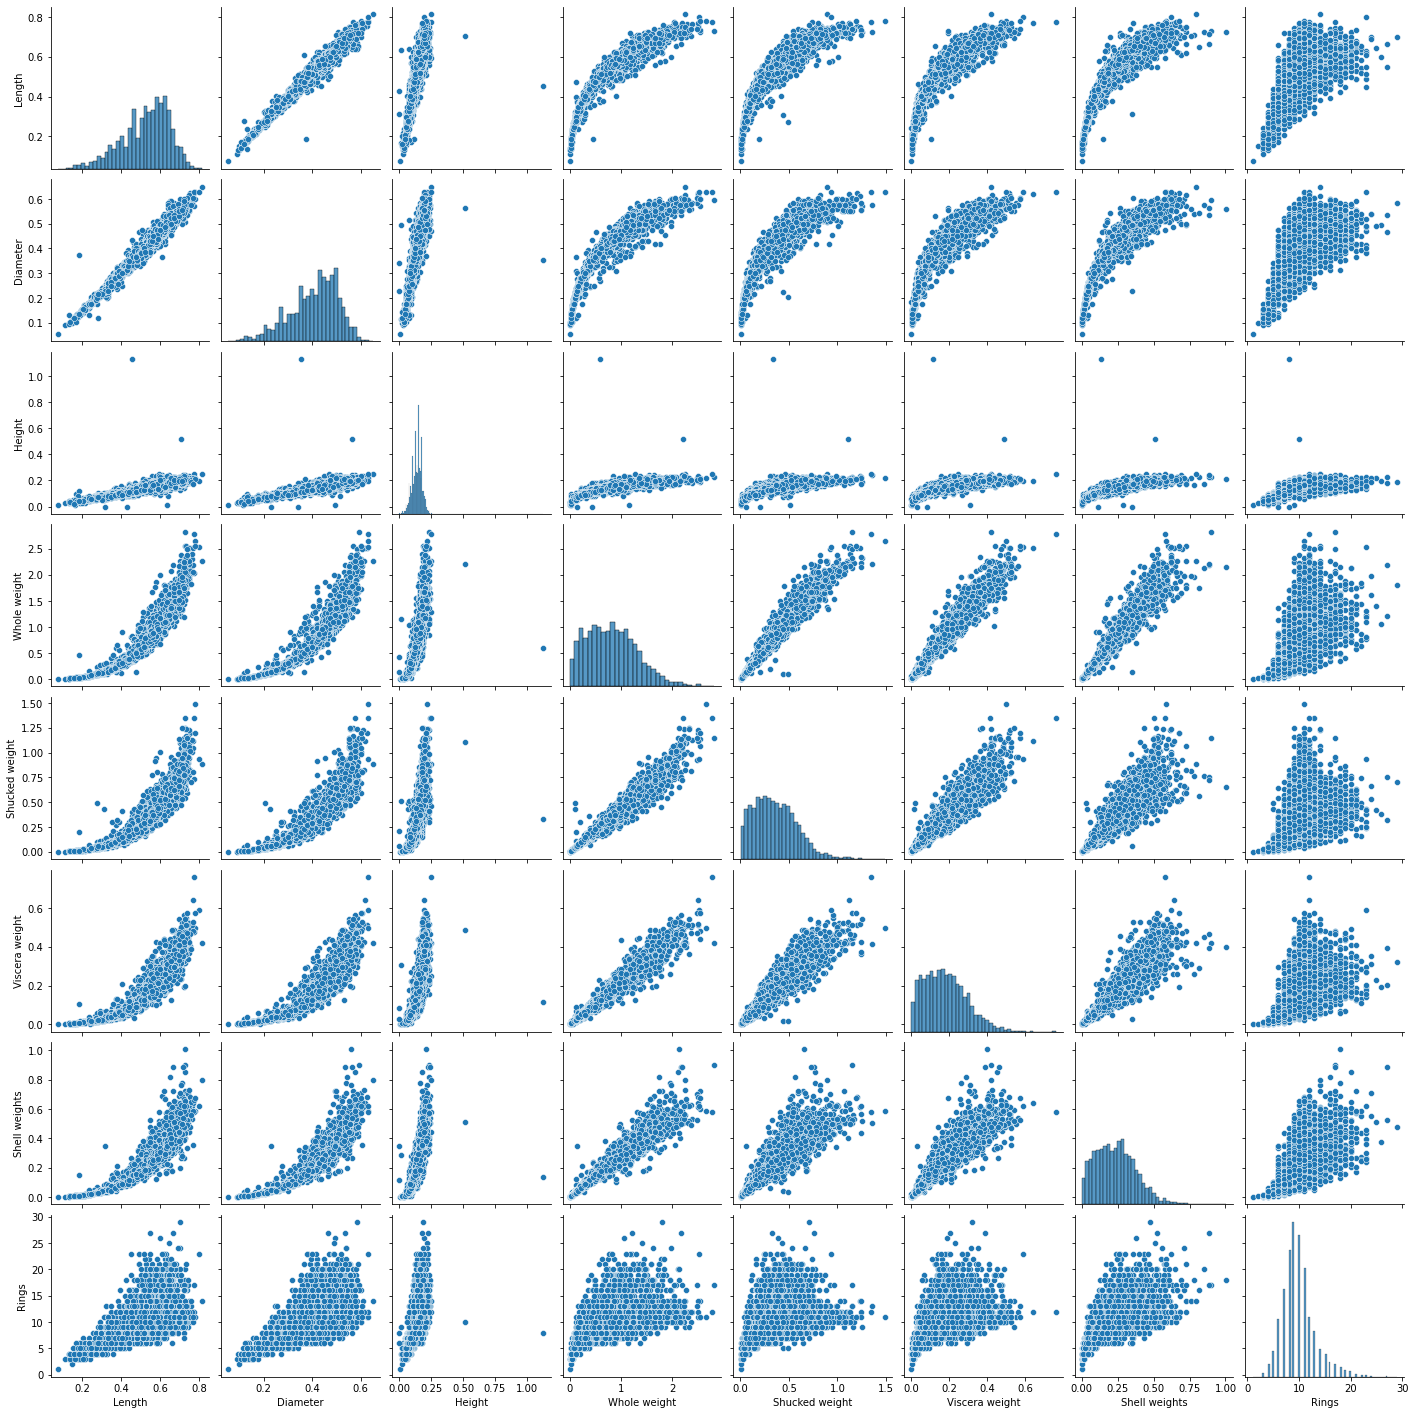

In [ ]:
plt.figure()
sns.pairplot(abalone_data, diag_kind = "hist")
plt.show()

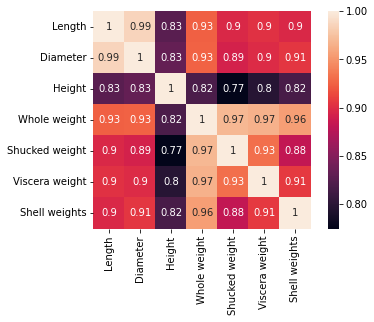

In [ ]:
plt.figure()
sns.heatmap(abalone_data.iloc[:,:-1].corr(),annot = True, square = True)
plt.show()

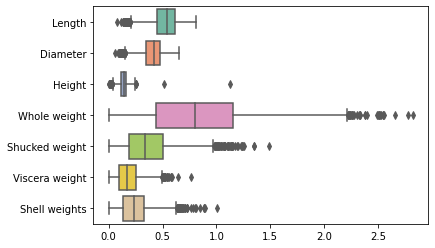

In [ ]:
plt.figure()
sns.boxplot(data = abalone_data.iloc[:,:-1],orient = 'h',palette = 'Set2')
plt.show()

we find different features to be having different ranges through this box-plot, which indicates that scaling the features may be useful.

In [ ]:
abalone_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weights   4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


For the information above, all features are continuous variables except for the sex feature

In [ ]:
abalone_data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weights,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


The count row shows that there are no missing values.

However, in the Height feature the minimum value is zero. This possibility calls for a missing value is zero in the data

In [ ]:
abalone_data['Rings'].unique()

array([15,  7,  9, 10,  8, 20, 16, 19, 14, 11, 12, 18, 13,  5,  4,  6, 21,
       17, 22,  1,  3, 26, 23, 29,  2, 27, 25, 24])

In [ ]:
abalone_data['Rings'].value_counts().sort_index()

1       1
2       1
3      15
4      57
5     115
6     259
7     391
8     568
9     689
10    634
11    487
12    267
13    203
14    126
15    103
16     67
17     58
18     42
19     32
20     26
21     14
22      6
23      9
24      2
25      1
26      1
27      2
29      1
Name: Rings, dtype: int64

we can see that the target is 1 to 29 (but there is no 28), so the classification we are going to do is a multiclass classification.

# Missing Values (or 0 values)

In [ ]:
(abalone_data['Height'] == 0).sum()

2

In [ ]:
abalone_data[abalone_data['Height'] == 0]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weights,Rings
1257,I,0.430,0.34,0.0,0.428,0.2065,0.0860,0.1150,8
3996,I,0.315,0.23,0.0,0.134,0.0575,0.0285,0.3505,6


The number of missing values is 2 and is in the infant sex. Then we change value 0 to null . We will fill in the missing value with the average height for infant gender.

In [ ]:
means = pd.pivot_table(abalone_data, index=['Sex'], aggfunc = {'Height' : np.mean})
means

,Height
Sex,
F,0.158011
I,0.107996
M,0.151381


so we will fill in the missing value with 0.107996. (will do this in a little while during preprocessing)

# Storing data in forms of X and Y

In [ ]:
X = abalone_data.iloc[:,:-1]
y = abalone_data.iloc[:,-1]

In [ ]:
X[:5]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weights
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [ ]:
y[:5]

0    15
1     7
2     9
3    10
4     7
Name: Rings, dtype: int64

# Splitting data into train and test set

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)

# Pipelining

we will use pipelines to perform preprocessing of the data, which will include: handling missing (or 0 values), scaling the feature and handling the categorical features

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier

# Identifying the numeric and Categorical feature for performing different preprocessing

In [ ]:
numeric_features = ['Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weights']
categorical_feature = ['Sex']

In [ ]:
numeric_transformer = Pipeline(
                               steps = [('imputer', SimpleImputer(missing_values = 0, strategy = 'constant', fill_value = 0.107996)),
                                        ("scaler", StandardScaler())])

In [ ]:
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

In [ ]:
preprocessor = ColumnTransformer(transformers=
                                              [("num", numeric_transformer, numeric_features),
                                               ("cat", categorical_transformer, categorical_feature)])

In [ ]:
clf = Pipeline(steps=[("preprocessor", preprocessor),
                      ("classifier", DecisionTreeClassifier(max_depth=3, random_state = 42))])

In [ ]:
clf.fit(X_train,y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value=0.107996,
                                                                                 missing_values=0,
                                                                                 strategy='constant')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Length', 'Diameter',
                                                   'Height', 'Whole weight',
                                                   'Shucked weight',
                                                   'Viscera weight',
                                                   'Shell weights']),
    

In [ ]:
print("test score", clf.score(X_test, y_test))

test score 0.2452153110047847


In [ ]:
y_pred = clf.predict(X_test)

Let us compare actual and predicted values of y.

In [ ]:
comparison = np.concatenate((y_pred.reshape(len(y_pred),1),y_test.values.reshape(len(y_test),1)),1)

for each in comparison:
  print(each)

[10 13]
[8 8]
[10 11]
[4 5]
[10 12]
[10 11]
[9 7]
[8 8]
[7 7]
[10  9]
[7 8]
[5 8]
[ 9 11]
[8 9]
[5 4]
[10  7]
[9 7]
[10 17]
[10  7]
[7 7]
[7 7]
[7 5]
[8 8]
[9 9]
[10 10]
[10 10]
[4 5]
[11 15]
[ 8 10]
[10 14]
[9 8]
[4 4]
[10  9]
[11 13]
[7 7]
[8 7]
[7 8]
[10  9]
[7 8]
[10 11]
[ 8 15]
[ 8 12]
[ 8 17]
[10 16]
[10 11]
[ 8 11]
[9 8]
[10 10]
[10 11]
[7 6]
[10 13]
[7 7]
[ 9 13]
[11 20]
[ 8 12]
[9 7]
[5 8]
[ 9 10]
[7 7]
[7 7]
[10  9]
[9 9]
[ 9 11]
[7 8]
[7 7]
[11 12]
[11 13]
[10 17]
[8 8]
[11 12]
[8 9]
[11 17]
[10 10]
[8 6]
[ 8 11]
[8 8]
[10  8]
[8 9]
[10  8]
[8 8]
[10  8]
[5 6]
[7 7]
[10 13]
[ 8 11]
[7 6]
[10  9]
[11 12]
[4 5]
[7 6]
[ 9 11]
[ 8 11]
[9 8]
[7 7]
[10 16]
[5 8]
[ 8 11]
[9 8]
[10 18]
[10 11]
[10 12]
[ 8 14]
[10 12]
[10 11]
[5 6]
[10  9]
[7 7]
[7 6]
[ 7 11]
[10 11]
[11 11]
[11 12]
[ 8 20]
[ 9 10]
[10 14]
[11 10]
[10 10]
[10 12]
[5 4]
[ 8 12]
[7 7]
[10 13]
[7 6]
[8 8]
[10 17]
[10 15]
[10  9]
[10 11]
[7 7]
[10 11]
[10  8]
[9 7]
[8 7]
[10 10]
[11 11]
[10  9]
[ 8 10]
[8 9]
[7 8]
[11 16

# Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, plot_confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 0  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  5  5  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  7 14  0 10  0  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1 12  0 28  4  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  3  0 56 13 22  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  3  0 25 43 28 13  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  7 47 24 47  2  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  4 22 17 49 15  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  2 20 14 45 14  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1 17  3 30 15  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  8  2 18 10  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 12  0 11  3  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  4  1  8  5  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  4  0  5  4  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  5  4  0  0

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


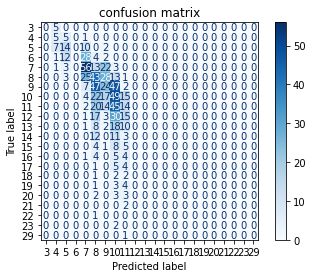

In [ ]:
plot_confusion_matrix(clf,X_test, y_test, cmap = plt.cm.Blues)
plt.title('confusion matrix')
plt.show()

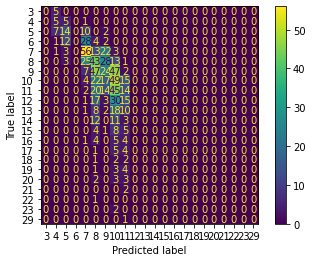

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
plt.show()

In [ ]:
from sklearn.metrics import classification_report

CR = classification_report(y_test, y_pred)
print(CR)

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.26      0.45      0.33        11
           5       0.38      0.42      0.40        33
           6       0.00      0.00      0.00        47
           7       0.41      0.57      0.48        98
           8       0.21      0.38      0.27       113
           9       0.21      0.19      0.20       127
          10       0.20      0.46      0.28       107
          11       0.16      0.15      0.16        95
          12       0.00      0.00      0.00        66
          13       0.00      0.00      0.00        39
          14       0.00      0.00      0.00        26
          15       0.00      0.00      0.00        18
          16       0.00      0.00      0.00        14
          17       0.00      0.00      0.00        10
          18       0.00      0.00      0.00         5
          19       0.00      0.00      0.00         8
          20       0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Visualizing Decision Tree

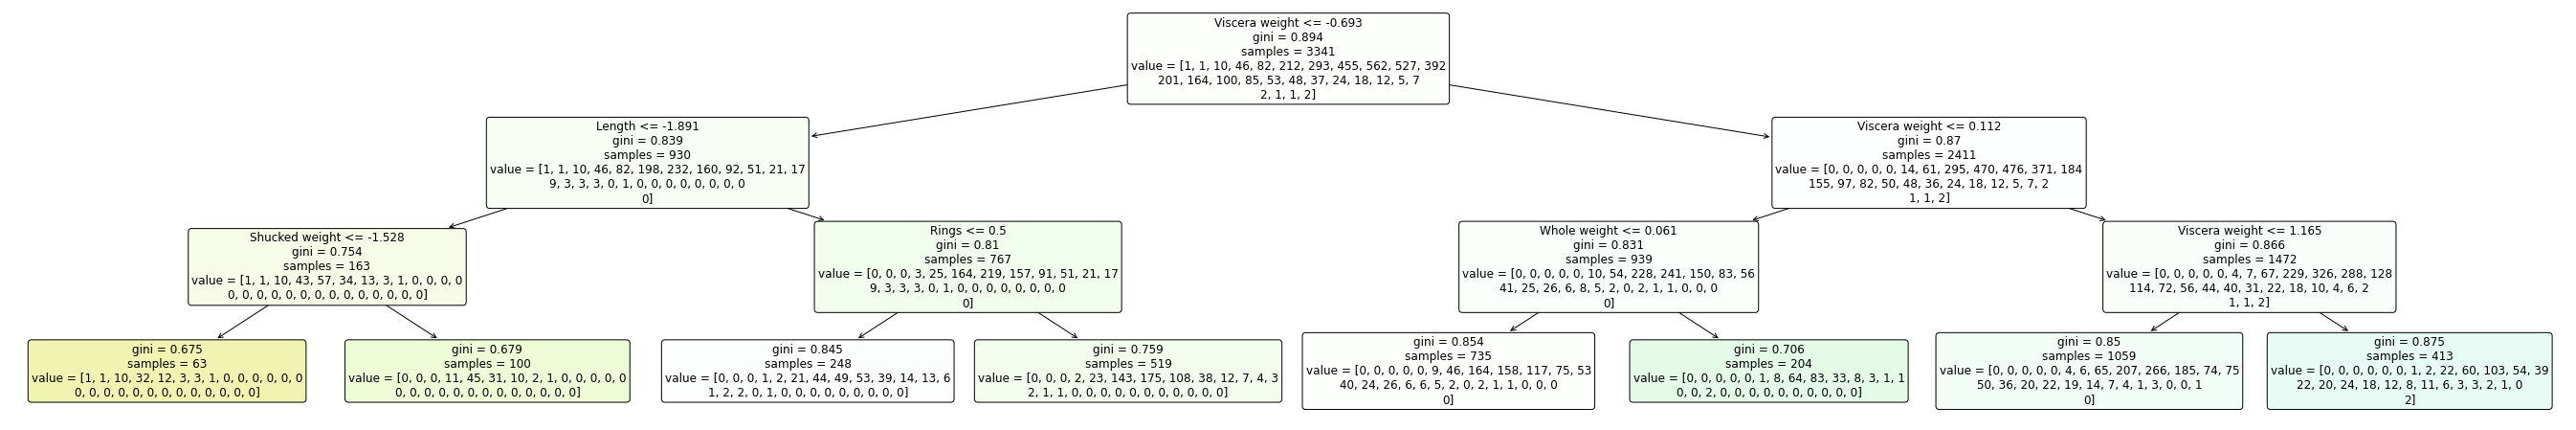

In [ ]:
from sklearn import tree

plt.figure(figsize = (48,8),facecolor='w')

a = tree.plot_tree(clf['classifier'],
                   feature_names= column_names,
                   rounded = True,
                   filled = True,
                   fontsize = 12)

plt.show()

In [ ]:
column_names

['Sex',
 'Length',
 'Diameter',
 'Height',
 'Whole weight',
 'Shucked weight',
 'Viscera weight',
 'Shell weights',
 'Rings']

# Finding best parameter using GridSearchCV

In [ ]:
x_train_new = preprocessor.fit_transform(X_train)

In [ ]:
from sklearn.model_selection import GridSearchCV
#from sklearn.metrics import recall
tuned_parameters = [{'max_depth' : [1,2,3,4,5,6,7,8,9],
                     'min_samples_split':[2,4,6,8,10]}]
                    
scores = ['recall']

for score in scores:
  print()
  print(f"Tuning Hyperparameter for {score}")
  print()

  clf_cv = GridSearchCV(DecisionTreeClassifier(), 
                        tuned_parameters,
                        scoring = f"{score}_macro")
  
  clf_cv.fit(x_train_new, y_train)
  print("Best Parameters")
  print()
  print(clf_cv.best_params_)
  print()
  print("Grid scores")
  means = clf_cv.cv_results_["mean_test_score"]
  stds = clf_cv.cv_results_["std_test_score"]
  for mean, std, params in zip(means, stds, clf_cv.cv_results_['params']):
    print(f"{mean:0.3f} (+/-{std :0.3f}) for {params}")




Tuning Hyperparameter for recall



/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavio

Best Parameters

{'max_depth': 5, 'min_samples_split': 2}

Grid scores
0.073 (+/-0.004) for {'max_depth': 1, 'min_samples_split': 2}
0.073 (+/-0.004) for {'max_depth': 1, 'min_samples_split': 4}
0.073 (+/-0.004) for {'max_depth': 1, 'min_samples_split': 6}
0.073 (+/-0.004) for {'max_depth': 1, 'min_samples_split': 8}
0.073 (+/-0.004) for {'max_depth': 1, 'min_samples_split': 10}
0.107 (+/-0.005) for {'max_depth': 2, 'min_samples_split': 2}
0.107 (+/-0.005) for {'max_depth': 2, 'min_samples_split': 4}
0.107 (+/-0.005) for {'max_depth': 2, 'min_samples_split': 6}
0.107 (+/-0.005) for {'max_depth': 2, 'min_samples_split': 8}
0.107 (+/-0.005) for {'max_depth': 2, 'min_samples_split': 10}
0.131 (+/-0.006) for {'max_depth': 3, 'min_samples_split': 2}
0.131 (+/-0.006) for {'max_depth': 3, 'min_samples_split': 4}
0.131 (+/-0.006) for {'max_depth': 3, 'min_samples_split': 6}
0.131 (+/-0.006) for {'max_depth': 3, 'min_samples_split': 8}
0.131 (+/-0.006) for {'max_depth': 3, 'min_samples_split': 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Lets use our best features

In [ ]:
clf = Pipeline(steps=[("preprocessor", preprocessor),
                      ("classifier", DecisionTreeClassifier(max_depth=5,min_samples_split=4, random_state = 42))])

In [ ]:
clf.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value=0.107996,
                                                                                 missing_values=0,
                                                                                 strategy='constant')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Length', 'Diameter',
                                                   'Height', 'Whole weight',
                                                   'Shucked weight',
                                                   'Viscera weight',
                                                   'Shell weights']),
    

In [ ]:
print("model score: %.3f"% clf.score(X_test, y_test))

model score: 0.272
